# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

'''from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe()) '''

Paso 1: Carga del conjunto de datos


In [1]:
# Example importing the CSV here
import pandas as pd

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Paso 2: Realiza un EDA completo


In [2]:
# Obtener las dimensiones
dataframe.shape

(41188, 21)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Eliminar duplicados
dataframe.duplicated().sum()


12

In [5]:
dataframe.drop_duplicates(inplace = True)

In [6]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

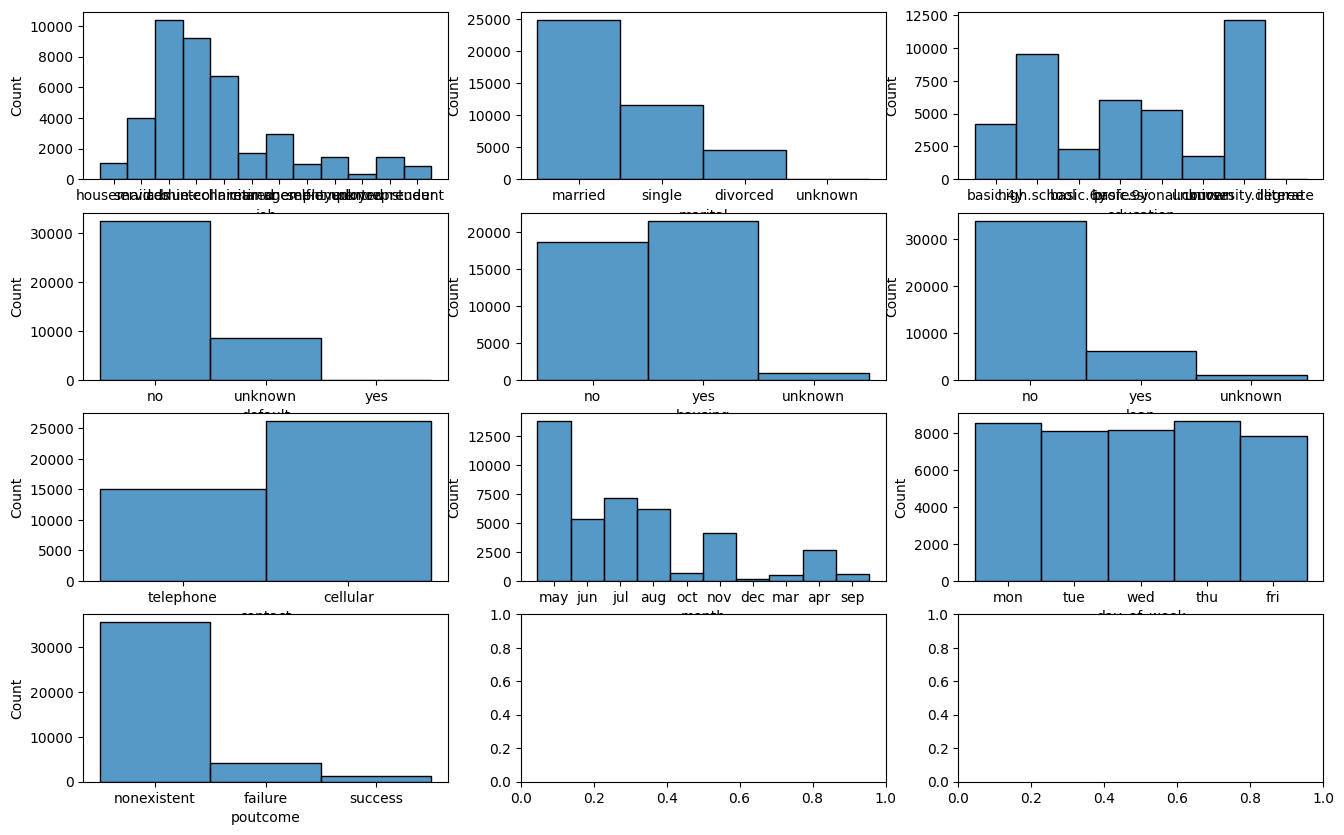

In [22]:
#Análisis sobre variables categóricas


import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(4, 3, figsize=(16, 10))

# Crear histogramas
sns.histplot(ax=axes[0, 0], data=dataframe, x='job')
sns.histplot(ax=axes[0, 1], data=dataframe, x='marital')
sns.histplot(ax=axes[0, 2], data=dataframe, x='education')
sns.histplot(ax=axes[1, 0], data=dataframe, x='default')
sns.histplot(ax=axes[1, 1], data=dataframe, x='housing')
sns.histplot(ax=axes[1, 2], data=dataframe, x='loan')
sns.histplot(ax=axes[2, 0], data=dataframe, x='contact')
sns.histplot(ax=axes[2, 1], data=dataframe, x='month')
sns.histplot(ax=axes[2, 2], data=dataframe, x='day_of_week')
sns.histplot(ax=axes[3, 0], data=dataframe, x='poutcome')

'''# Eliminar subplots vacío
fig.delaxes(axes[3, 1])
fig.delaxes(axes[3, 2])'''

'''# Ajustar diseño
plt.tight_layout()
'''
# Mostrar el gráfico
plt.show()

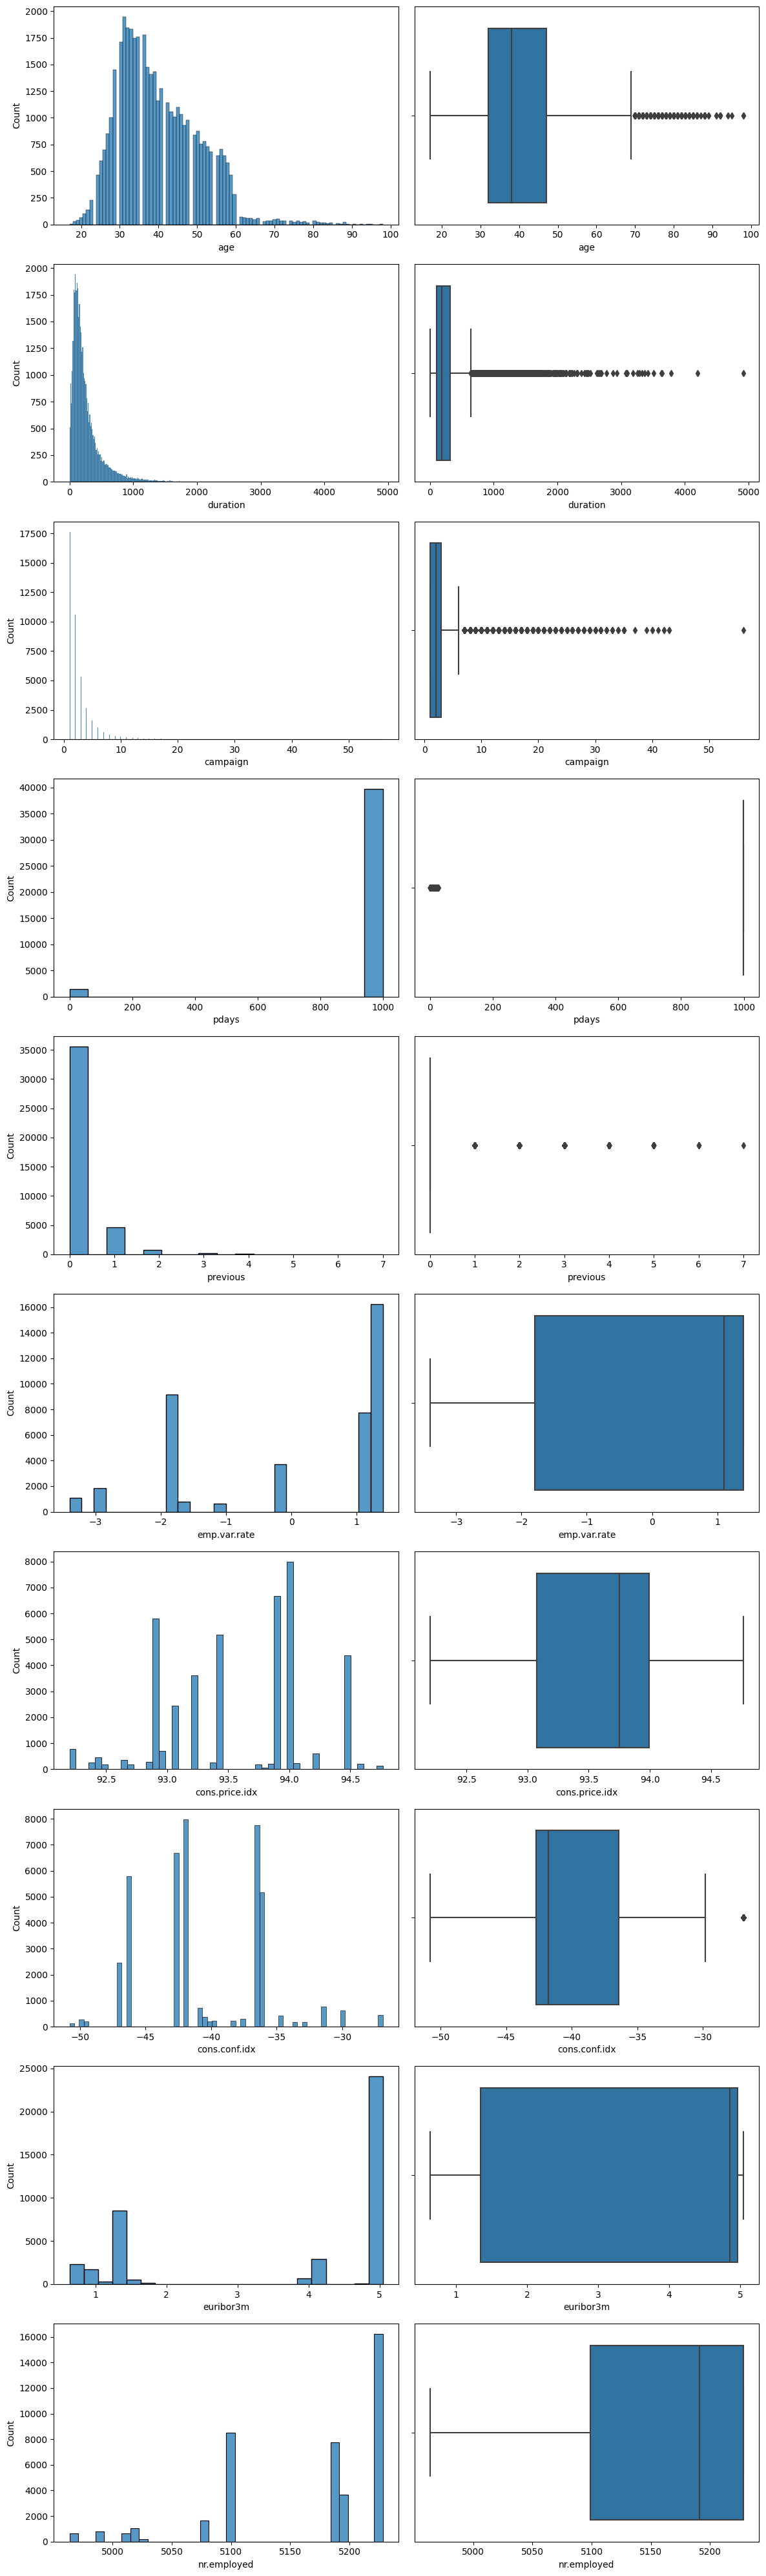

In [11]:
#Análisis sobre variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 10 filas y 2 columnas
fig, axis = plt.subplots(10, 2, figsize=(12, 40))

# Gráficos de las variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="age")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="age")
sns.histplot(ax=axis[1, 0], data=dataframe, x="duration")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="duration")
sns.histplot(ax=axis[2, 0], data=dataframe, x="campaign")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="campaign")
sns.histplot(ax=axis[3, 0], data=dataframe, x="pdays")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="pdays")
sns.histplot(ax=axis[4, 0], data=dataframe, x="previous")
sns.boxplot(ax=axis[4, 1], data=dataframe, x="previous")
sns.histplot(ax=axis[5, 0], data=dataframe, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="emp.var.rate")
sns.histplot(ax=axis[6, 0], data=dataframe, x="cons.price.idx")
sns.boxplot(ax=axis[6, 1], data=dataframe, x="cons.price.idx")
sns.histplot(ax=axis[7, 0], data=dataframe, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=dataframe, x="cons.conf.idx")
sns.histplot(ax=axis[8, 0], data=dataframe, x="euribor3m")
sns.boxplot(ax=axis[8, 1], data=dataframe, x="euribor3m")
sns.histplot(ax=axis[9, 0], data=dataframe, x="nr.employed")
sns.boxplot(ax=axis[9, 1], data=dataframe, x="nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

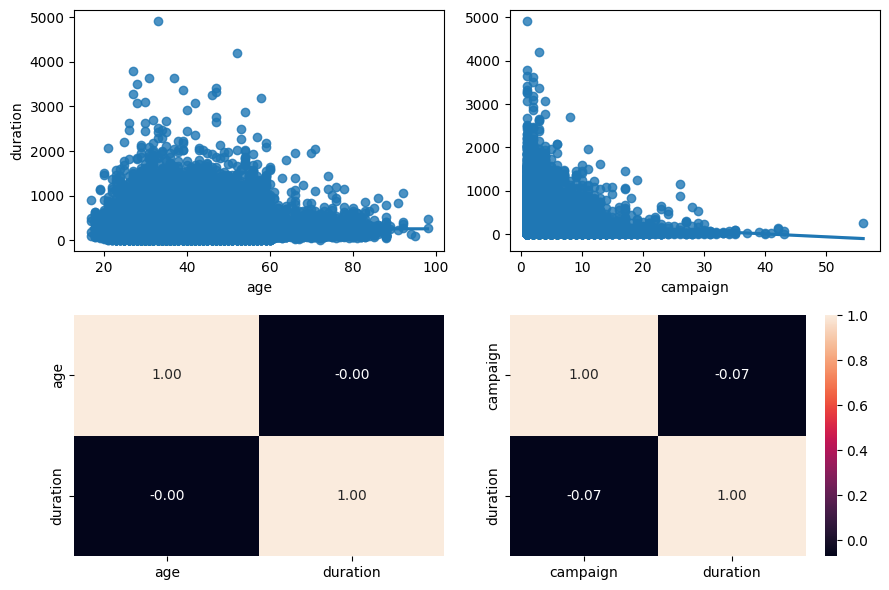

In [12]:
#Análisis numérico-numérico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(9, 6))

# Gráfico de dispersión y correlación entre "age" y "duration"
sns.regplot(ax=axis[0, 0], data=dataframe, x="age", y="duration")
sns.heatmap(dataframe[["age", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico de dispersión y correlación entre "campaign" y "previous"
sns.regplot(ax=axis[0, 1], data=dataframe, x="campaign", y="duration").set(ylabel=None)
sns.heatmap(dataframe[["campaign", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

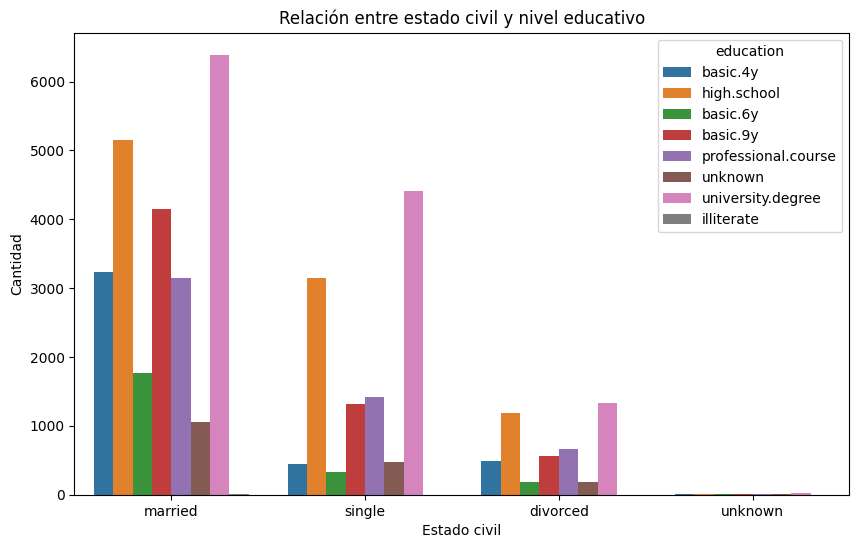

In [13]:
#Análisis categórico-categórico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia entre las variables categóricas
contingency_table = pd.crosstab(dataframe['marital'], dataframe['education'])

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='marital', hue='education')

# Establecer título y etiquetas de los ejes
plt.title("Relación entre estado civil y nivel educativo")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

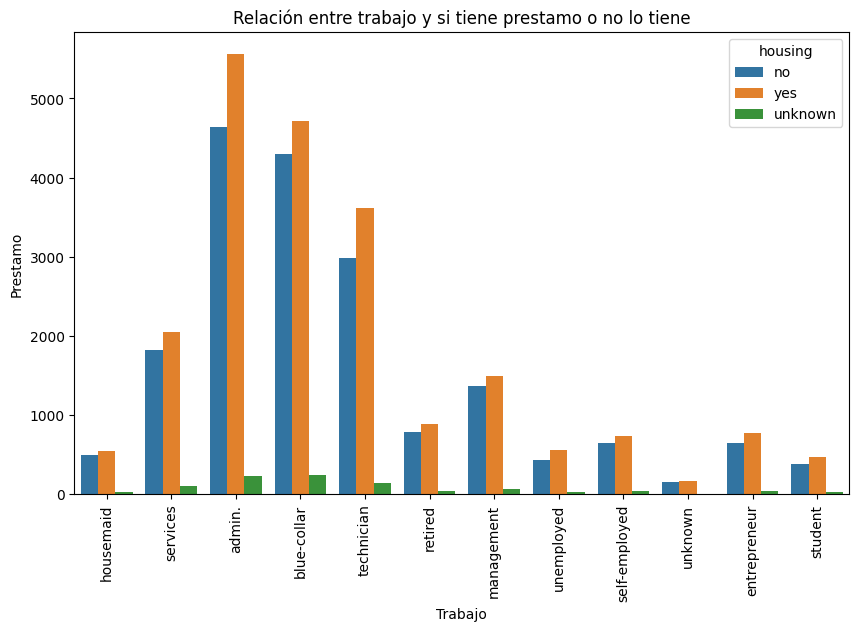

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia entre las variables categóricas
contingency_table = pd.crosstab(dataframe['job'], dataframe['housing'])

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='job', hue='housing')

# Establecer título y etiquetas de los ejes
plt.title("Relación entre trabajo y si tiene prestamo o no lo tiene")
plt.xlabel("Trabajo")
plt.ylabel("Prestamo")

# Girar las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

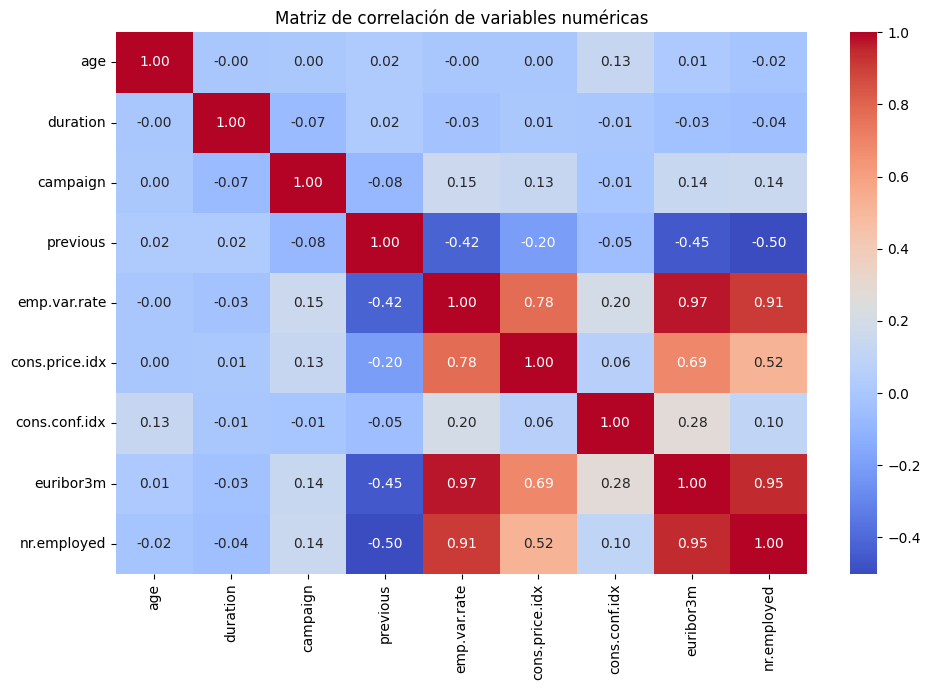

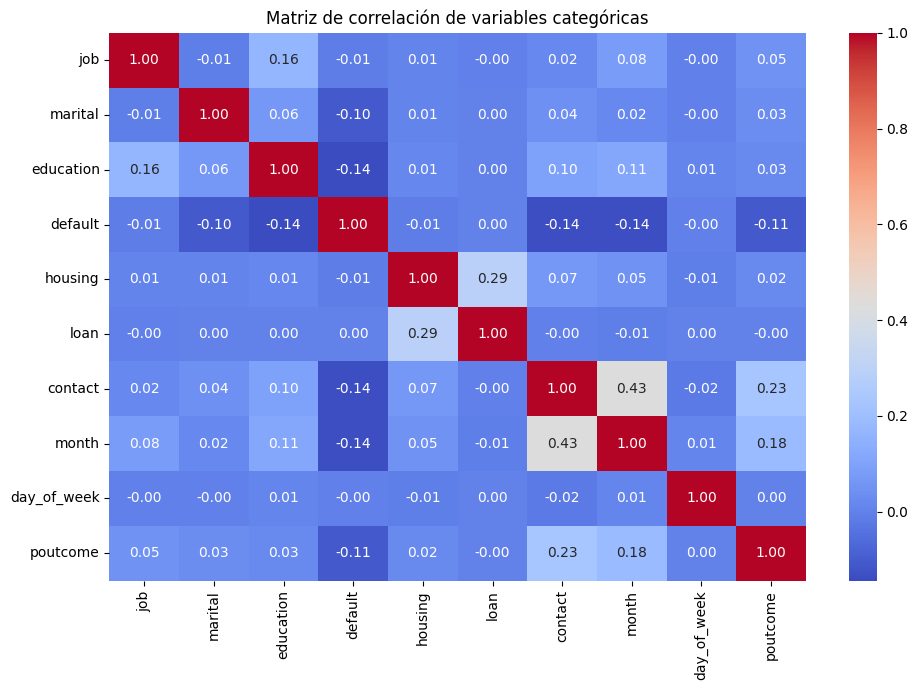

In [15]:
#Análisis numérico-categórico (completo y OPCIONAL)


import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe[numeric_columns].corr()

# Crear el mapa de calor de correlación para variables numéricas
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_numeric, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr()

# Crear el mapa de calor de correlación para variables categóricas
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_categorical, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables categóricas")
plt.tight_layout()
plt.show()

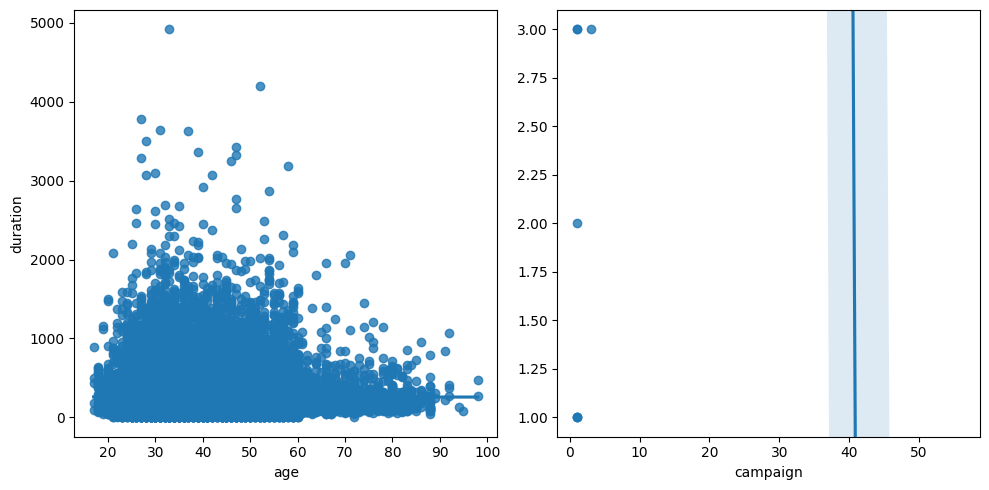

In [16]:
#Analizamos las variables vistas numericas

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = dataframe, x = "age", y = "duration")
sns.regplot(ax = axis[1], data = dataframe, x = "campaign", y = "duration").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

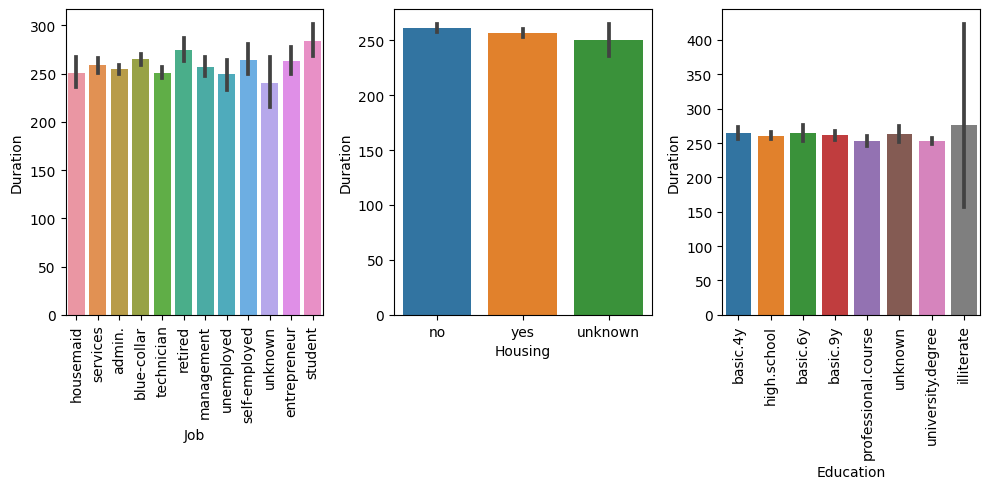

In [17]:
#Analizamos las variables vistas categoricas

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(10, 5), ncols=3)

sns.barplot(ax=axes[0], data=dataframe, x="job", y="duration")
axes[0].set_xlabel("Job")
axes[0].set_ylabel("Duration")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(ax=axes[1], data=dataframe, x="housing", y="duration")
axes[1].set_xlabel("Housing")
axes[1].set_ylabel("Duration")

sns.barplot(ax=axes[2], data=dataframe, x="education", y="duration")
axes[2].set_xlabel("Education")
axes[2].set_ylabel("Duration")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

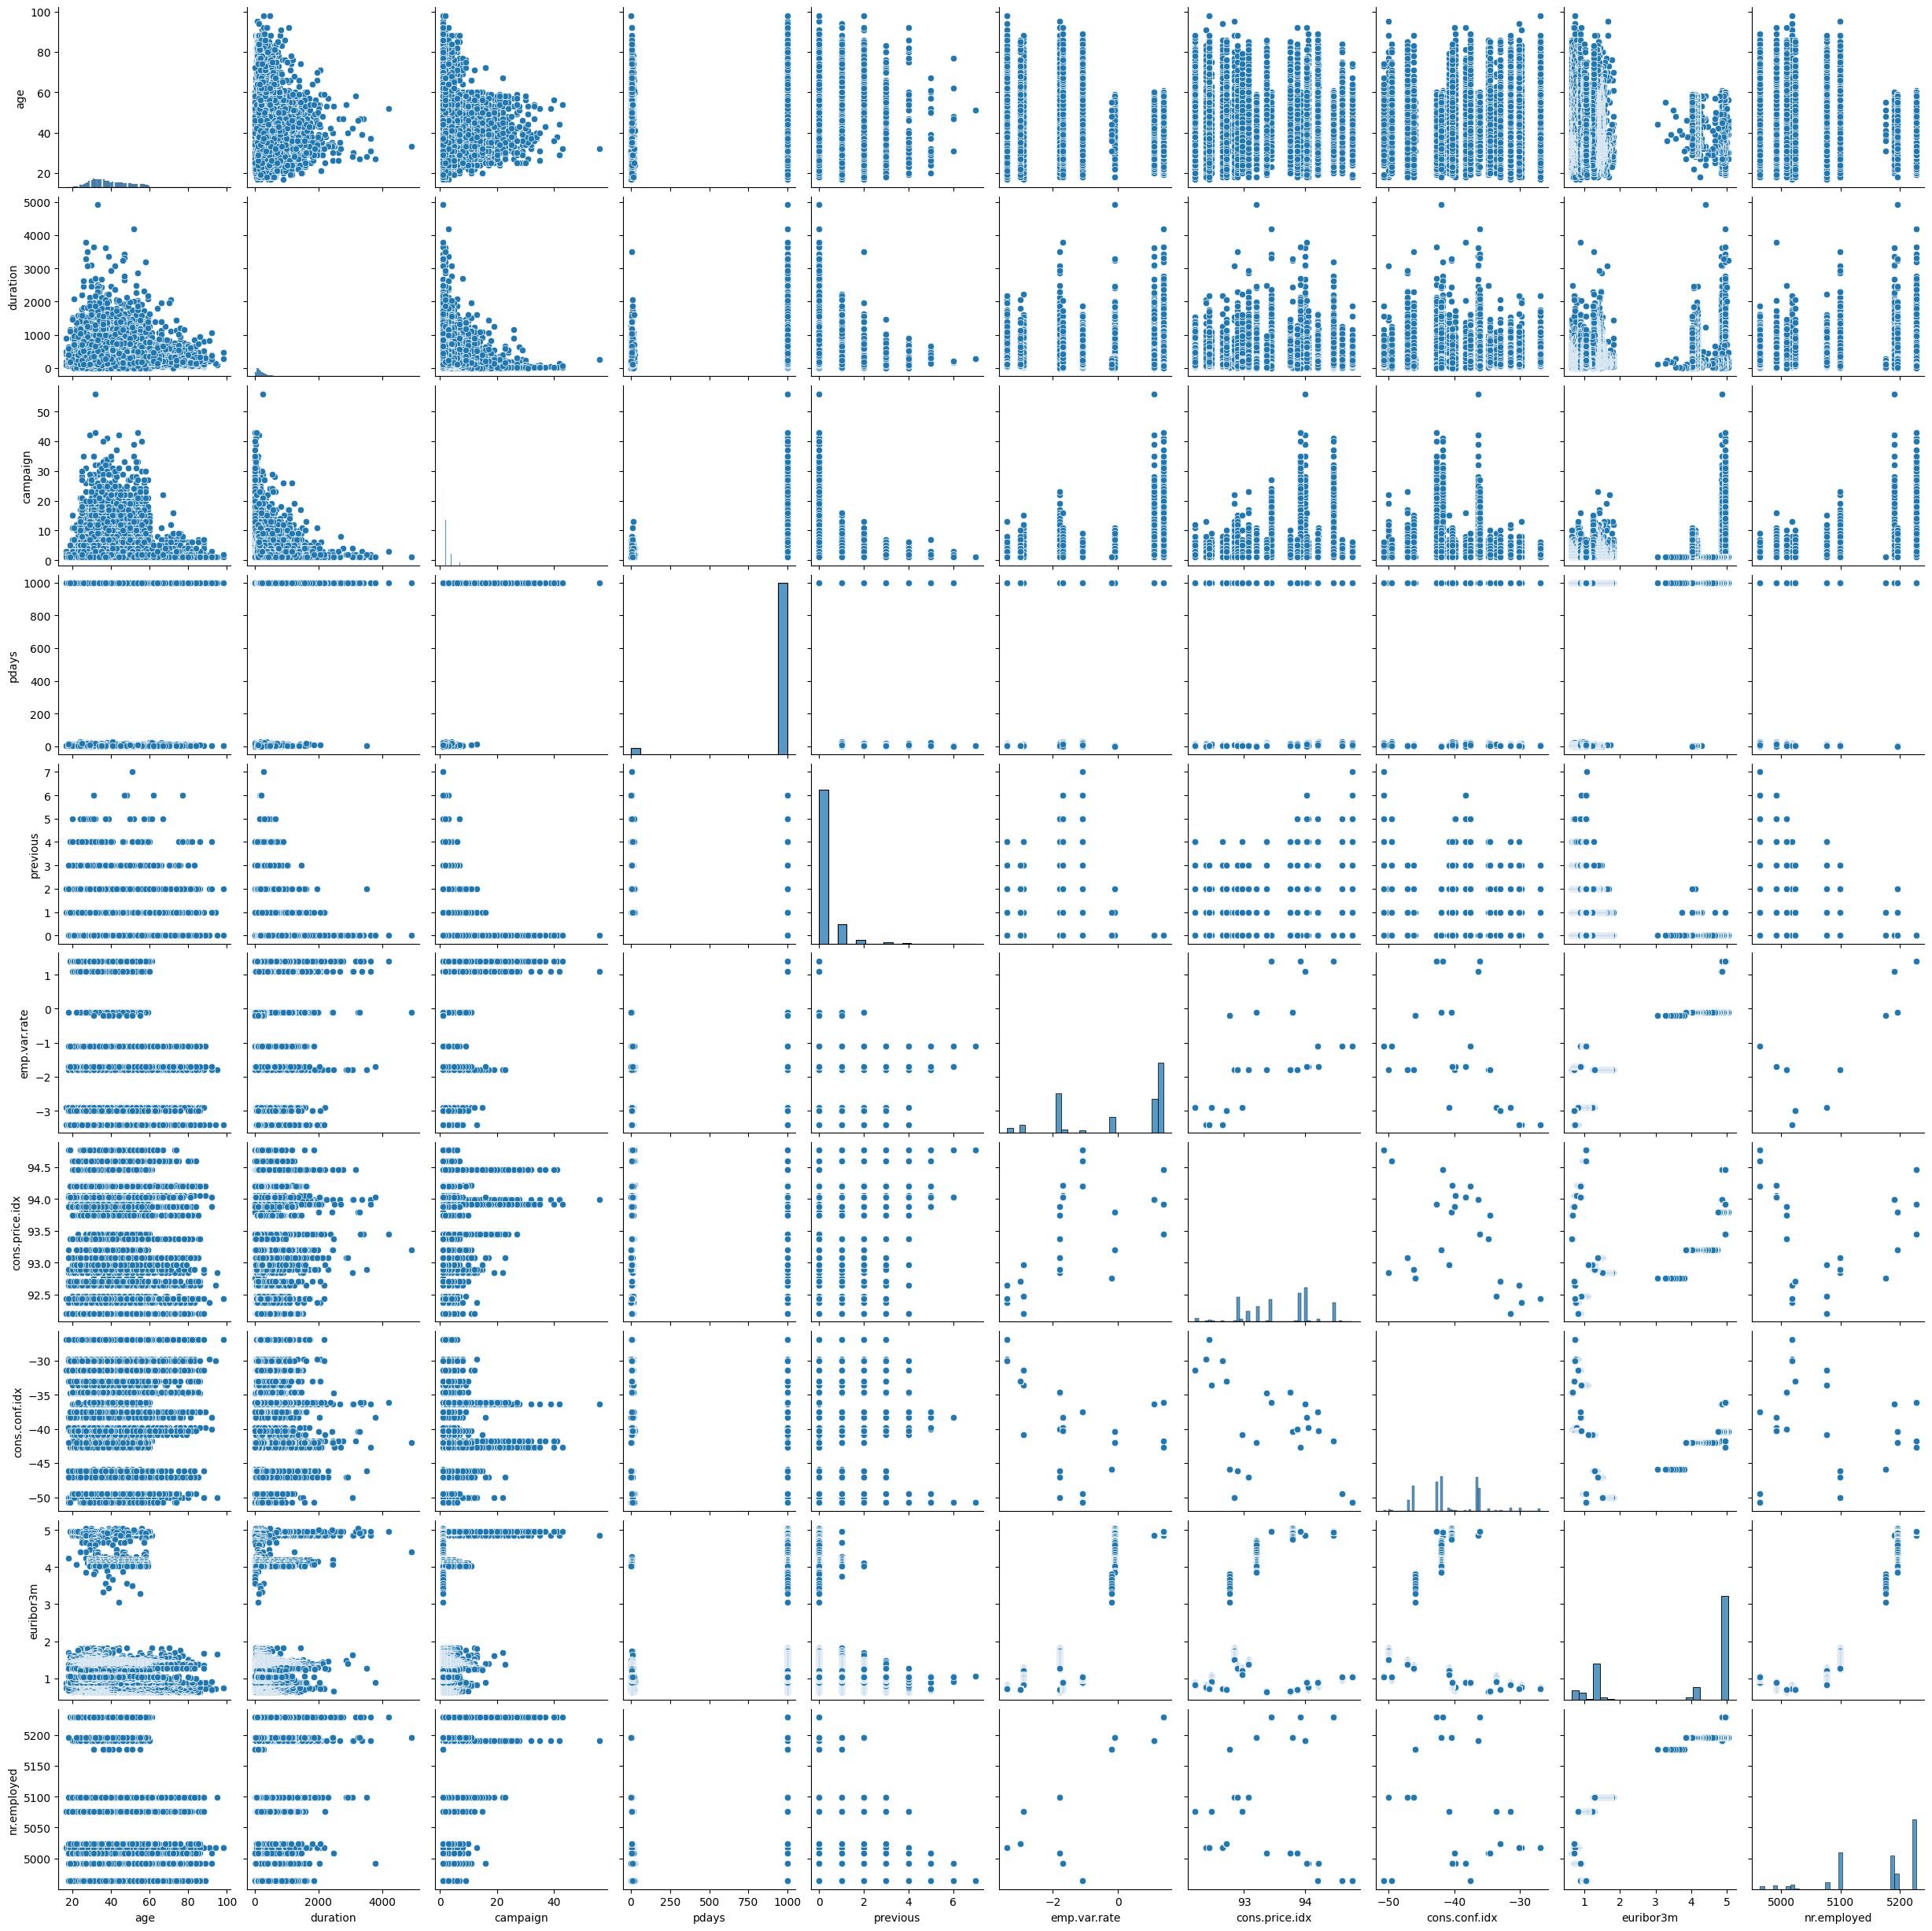

In [18]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [23]:
#análisis descriptivo para outliers

dataframe.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


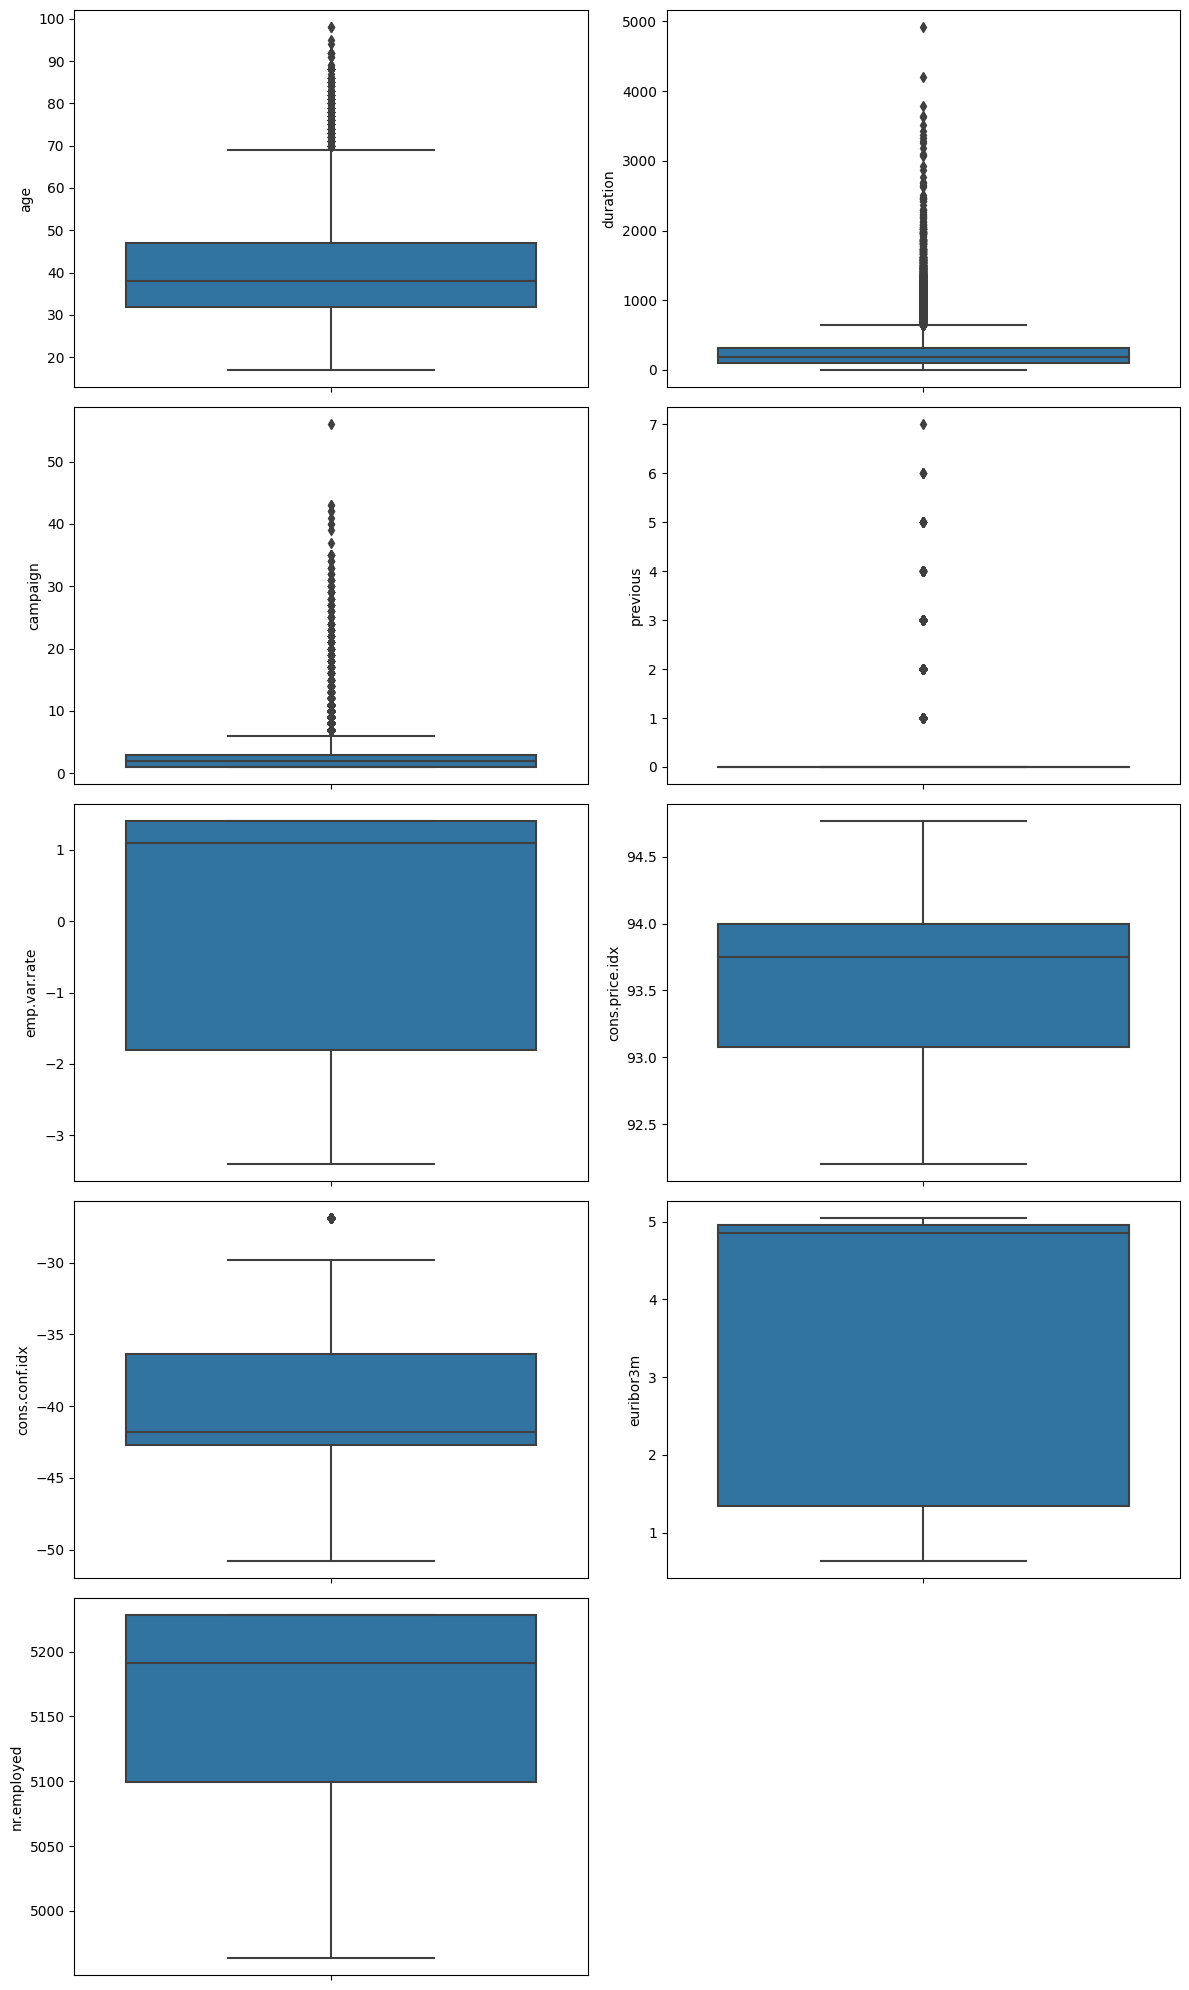

In [28]:
#Dibujar los diagramas de cajas de las variables

fig, axes = plt.subplots(5, 2, figsize=(12, 20))

sns.boxplot(ax=axes[0, 0], data=dataframe, y="age")
sns.boxplot(ax=axes[0, 1], data=dataframe, y="duration")
sns.boxplot(ax=axes[1, 0], data=dataframe, y="campaign")
sns.boxplot(ax=axes[1, 1], data=dataframe, y="previous")
sns.boxplot(ax=axes[2, 0], data=dataframe, y="emp.var.rate")
sns.boxplot(ax=axes[2, 1], data=dataframe, y="cons.price.idx")
sns.boxplot(ax=axes[3, 0], data=dataframe, y="cons.conf.idx")
sns.boxplot(ax=axes[3, 1], data=dataframe, y="euribor3m")
sns.boxplot(ax=axes[4, 0], data=dataframe, y="nr.employed")

# Eliminar ejes vacíos
fig.delaxes(axes[4, 1])


plt.tight_layout()

plt.show()

In [37]:
#eliminar outliers age

age_stats = dataframe["age"].describe()
print(age_stats)


fare_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * fare_iqr
lower_limit = age_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en price son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en price son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [42]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["age"] > 70]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [44]:
#eliminar outliers duration

duration_stats = dataframe["duration"].describe()
print(duration_stats)


fare_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * fare_iqr
lower_limit = duration_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en price son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en price son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [45]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["duration"] > 2500]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2313,39,self-employed,married,basic.4y,unknown,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
3774,35,student,single,high.school,no,no,yes,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,yes
4213,42,management,married,basic.6y,unknown,yes,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
6280,30,self-employed,married,basic.9y,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes
9276,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,yes
10456,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,yes
10707,30,self-employed,single,university.degree,no,yes,no,telephone,jun,tue,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes
11360,26,technician,single,university.degree,no,no,no,telephone,jun,thu,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
12029,58,retired,married,high.school,no,yes,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,yes


In [46]:
#eliminar outliers campaign

campaign_stats = dataframe["campaign"].describe()
print(campaign_stats)


fare_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * fare_iqr
lower_limit = campaign_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en price son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en price son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [54]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["campaign"] > 38]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,...,39,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
